<a href="https://colab.research.google.com/github/BMC-YK/RealEstateRegression/blob/main/RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


##**Data Cleaning**

In [ ]:
# Reads CSV dataset
df = pd.read_csv(r"https://raw.githubusercontent.com/BMC-YK/real-estate-model/main/dataset/RealEstateData.csv")

# Renaming Columns
# Train Station (TS), Convenience Stores (CS)
df.rename(columns = {'X3 distance to the nearest MRT station':'TS Distance',
                     'X2 house age': 'Age',
                     'X5 latitude': 'Lat',
                     'X6 longitude': 'Long',
                     'Y house price of unit area': 'USD Price',
                     'X4 number of convenience stores': 'CS Count'}, inplace = True)

# Converts TD per Ping to USD per Sq. Ft. and Meters to Miles
df['USD Price'] = df['USD Price'].apply(lambda x: x * 10000 * 0.033 / 35.57).round(decimals = 2)
df['TS Distance'] = df['TS Distance'].apply(lambda x: (x * 3.28084)/5280).round(decimals = 3)

# Removes outliers outside Xindian District
outliers = [36, 229, 345]
df = df[df.No.isin(outliers) == False]

# Dropping uneccessary columns
df.drop(["No", "X1 transaction date"], inplace=True, axis=1)

# Prints cleaned dataset
print(df)

      Age  TS Distance  CS Count       Lat       Long  USD Price
0    32.0        0.053        10  24.98298  121.54024     351.62
1    19.5        0.191         9  24.98034  121.53951     391.51
2    13.3        0.349         5  24.98746  121.54391     438.82
3    13.3        0.349         5  24.98746  121.54391     508.41
4     5.0        0.243         5  24.97937  121.54245     399.86
..    ...          ...       ...       ...        ...        ...
409  13.7        2.536         0  24.94155  121.50381     142.87
410   5.6        0.056         9  24.97433  121.54310     463.87
411  18.8        0.243         7  24.97923  121.53986     376.67
412   8.1        0.065         5  24.96674  121.54067     487.07
413   6.5        0.056         9  24.97433  121.54310     592.83

[411 rows x 6 columns]


##**Statistics**

In [ ]:
# Calculating Stats
dfMean = df[['Age','USD Price']].mean(numeric_only=True)

dfMedian = df[['Age', 'USD Price']].median(numeric_only=True)

dfVariance = df[['Age', 'USD Price']].var(numeric_only=True)

dfDeviation = df[['Age', 'USD Price']].std(numeric_only=True)

# Printing
print('Means:\n' + dfMean.to_string())
print('Medians:\n' + dfMedian.to_string())
print('Standard Deviations:\n' + dfVariance.to_string())
print('Variances:\n' + dfDeviation.to_string())


Means:
Age           17.694891
USD Price    352.334477
Medians:
Age           16.10
USD Price    356.26
Standard Deviations:
Age            129.924632
USD Price    16009.830995
Variances:
Age           11.398449
USD Price    126.529961


##**Visualizations**

Text(0, 0.5, 'Price (USD / SQ Ft)')

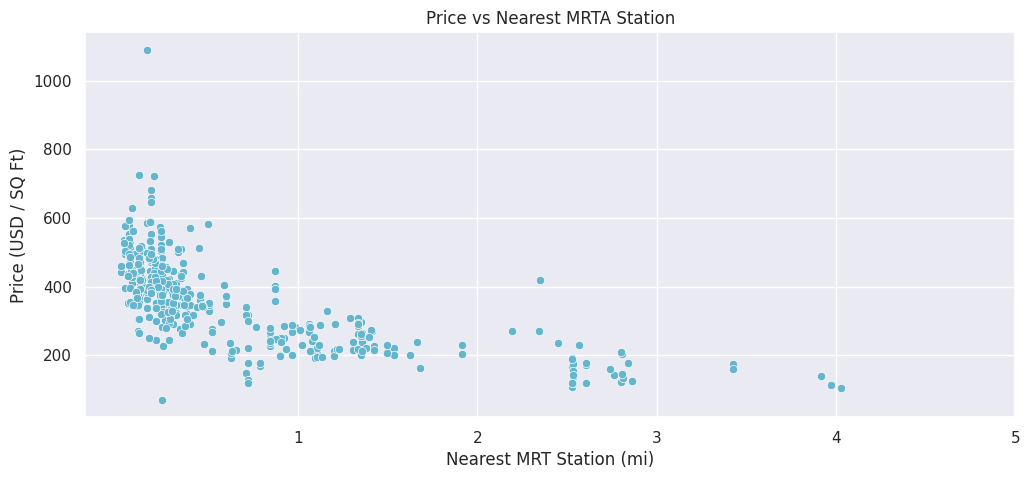

In [ ]:
# Plotting Points
sb.set(rc={'figure.figsize':(12,5)})
sb.scatterplot(x = df['TS Distance'], y = df['USD Price'], color='c');

# Setting Format
plt.title("Price vs Nearest MRTA Station")
plt.xticks(range(1,6))
plt.xlabel("Nearest MRT Station (mi)")
plt.ylabel("Price (USD / SQ Ft)")

In [ ]:
# Plotting Coordinates & Refining Visualization
fig = px.scatter_mapbox(df,
                        lon=df['Long'],
                        lat=df['Lat'],
                        zoom=12.25,
                        color=df["TS Distance"],
                        color_continuous_scale=px.colors.diverging.RdYlBu,
                        height=800,
                        width=900,
                        title='Distance From Nearest MRT Station by Property')

# Formatting Background/Margins
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})

Text(0, 0.5, 'Price (USD / SQ Ft)')

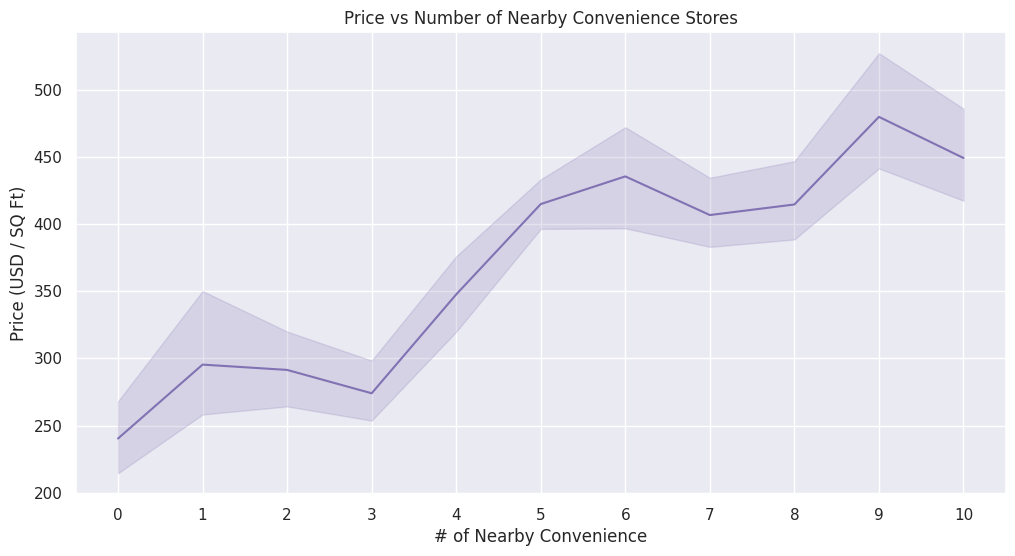

In [ ]:
# Plotting Points
sb.set(rc={'figure.figsize':(12,6)})
sb.lineplot(data=df, x="CS Count", y="USD Price", color='m');

# Setting Format
plt.title("Price vs Number of Nearby Convenience Stores")
plt.xticks(range(0,11))
plt.xlabel("# of Nearby Convenience")
plt.ylabel("Price (USD / SQ Ft)")


In [ ]:
# Plotting Coordinates & Refining Visualization
fig = px.scatter_mapbox(df,
                        lon=df['Long'],
                        lat=df['Lat'],
                        zoom=12.25,
                        color=df['CS Count'],
                        color_continuous_scale=px.colors.sequential.haline,
                        height=800,
                        width=900,
                        title='Convenience Store Heatmap')

# Formatting Background/Margins
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

Text(0, 0.5, 'Price (USD/SqFt)')

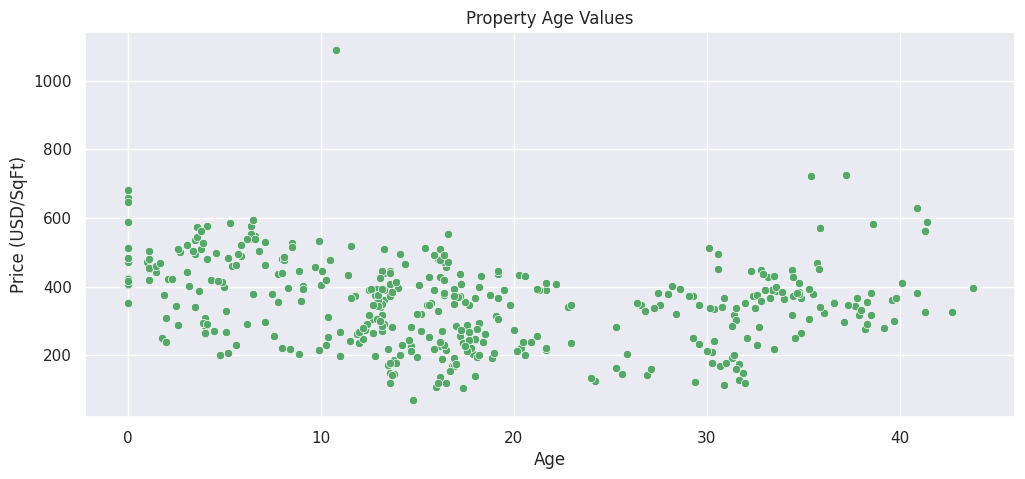

In [ ]:
# Plotting Points
sb.set(rc={'figure.figsize':(12,5)})
sb.scatterplot(x = df['Age'], y = df['USD Price'], color='g');

# Setting Format
plt.title('Property Age Values')
plt.ylabel('Price (USD/SqFt)')


Text(0.5, 0, 'Property Age (yrs)')

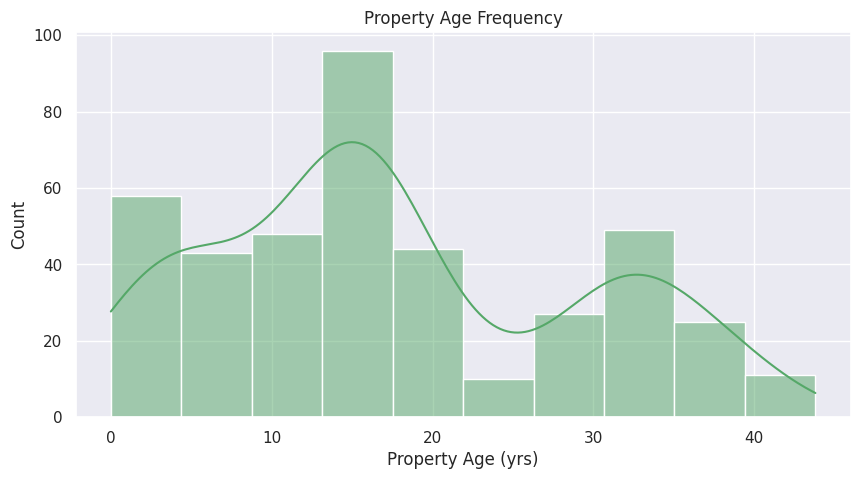

In [ ]:
#Plotting Freq. Data
sb.set(rc={'figure.figsize':(10,5)})
sb.histplot(data=df, x="Age", color='g', kde=True)

#Formatting Titles
plt.title("Property Age Frequency")
plt.xlabel("Property Age (yrs)")

In [ ]:
# Plotting Coordinates & Refining Visualization
fig = px.scatter_mapbox(df,
                        lon=df['Long'],
                        lat=df['Lat'],
                        zoom=12.25,
                        color=df['USD Price'],
                        color_continuous_scale=px.colors.sequential.RdBu,
                        height=800,
                        width=900,
                        title='Price by Property')

# Formatting Background/Margins
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

## **Regression Model**

In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from termcolor import colored as cl

In [ ]:
# Establishing Independent/Dependent Variables
X = df[['TS Distance', 'CS Count', 'Age']]
y = df['USD Price']

# Splitting data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 89)

# Implementing OLS Algorithm
ols = LinearRegression()
ols.fit(X_train, y_train)
output = ols.predict(X_test)

# Displaying R-Sqaured & Variance Score for model evaluation
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, output)), attrs = ['bold']))
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, output)), attrs = ['bold']))

# Displaying MSE
mse = mean_squared_error(y_test, output)
print(mse)

# R-Squared > 70%
# Variance > 60%
# Off by ~ 67.60

R-Squared of OLS model is 0.6930463399626522
Explained Variance Score of OLS model is 0.7018329994528758
4569.9345171355735
